
전체적인 데이터 EDA.
연령별 포커스
- 60대 : 코로나에 치명적!
- 20대 : 확진자가 많음. 이유는? : 해외 유입 뿐만이 아닌 불필요 방문지역 방문




마지막 ---------
2월을 제외한 코로나 확진자 추이와 감정소비 , 자살률 데이터 비교. (컨셉 : 감정)
뉴스 데이터 감성분석
..

In [77]:
# pip install plotly chart_studio --upgrade

In [78]:
# pip install cufflinks --upgrade

In [25]:
import os

import numpy as np 
import pandas as pd
import os
import glob
import re
import sys
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib import animation, rc

import plotly.express as px
import folium
from folium import plugins
import branca
import json

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots


pio.renderers.default = "notebook_connected"

In [26]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected = True)

In [27]:
files = glob.glob('dataset/*.csv')
data = []
for i in files :
    i = re.sub("dataset/", "", i)
    data.append(re.sub(".csv","",i))
for i in range(len(files)) :
    globals()[data[i]] = pd.read_csv(files[i])

In [28]:
os.chdir('G:/내 드라이브/Github/Stat_Bigdata_analysis_Competition_2022/2022-1/Data')

In [29]:
case = pd.read_csv('Case.csv')

time = pd.read_csv('Time.csv')
timeAge = pd.read_csv('timeAge.csv')
timeGender = pd.read_csv('timeGender.csv')
timeProvince = pd.read_csv('TimeProvince.csv')

PatientInfo = pd.read_csv('PatientInfo.csv')
patient = pd.read_csv('PatientInfo.csv')

---

20대 link : https://dacon.io/competitions/official/235590/codeshare/900?page=1&dtype=vote

제외시켜도될듯(우리가한것)

In [60]:
patientcount = PatientInfo.groupby('age').count().patient_id

<AxesSubplot:xlabel='age'>

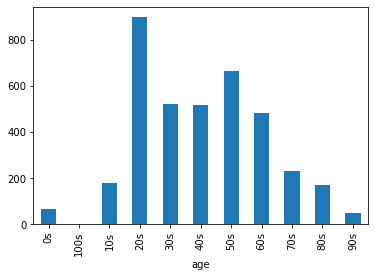

In [61]:
patientcount.plot(kind='bar')

20대의 확진자 수가 가장 많았다

확진자가 20대가 가장 많은 것을 확인 할 수 있다.

상대적으로 건강하다고 여겨지는 20대가 COVID-19에 면역력이 뛰어날 것이라는 생각에 배치됨.

In [62]:
patient20 = PatientInfo.loc[PatientInfo['age']=='20s']

<AxesSubplot:ylabel='infection_case'>

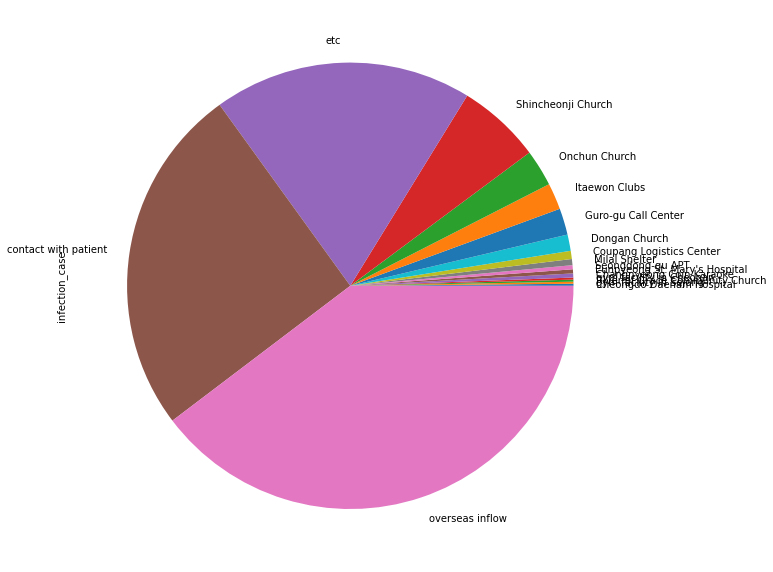

In [84]:
plt.figure(figsize=(10,15))
patient20.groupby('infection_case')['infection_case'].count().sort_values().plot(kind='pie')
# plt.legend(loc = 'lower left', ncol = 2, bbox_to_anchor = (0.5, 1))

<20대 확진자의 분포>

<AxesSubplot:ylabel='infection_case'>

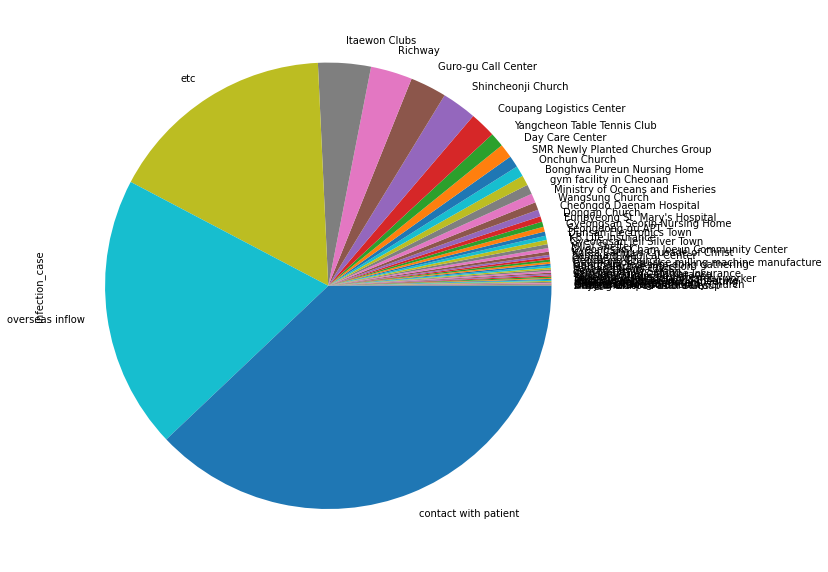

In [83]:
plt.figure(figsize=(10,15))
PatientInfo.groupby('infection_case')['infection_case'].count().sort_values().plot(kind='pie')
# plt.legend(loc = 'lower left', ncol = 2, bbox_to_anchor = (0.5, 1))

<전체 확진자의 분포>

전체 감염자 비율과는 조금 다르게 해외에서 유입되는 20대의 비율이 상당히 높았습니다.

그렇다면 20대의 확진자가 높은 이유가 단지 해외에서 유입되는 확진자 만이 원인일까요?

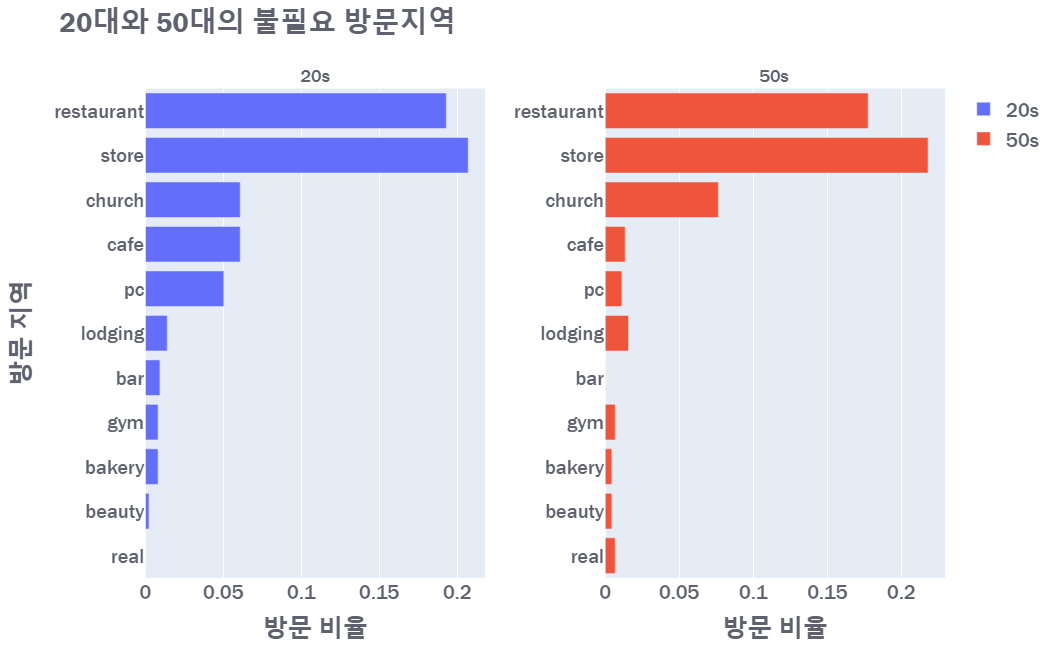

https://dacon.io/competitions/official/235590/codeshare/1069?page=1&dtype=recent&ptype=personal

헤당 링크의 결과를 보면

store, church는 비슷하게 방문하였으나

restaurant, pc방, cafe, bar 등에서 훨씬 많은 방문을 하였습니다.

20대는 활동 반경이 넓고 활발하며, 불필요한 방문 지역에 자주 방문하는 것을 확인하였습니다.

외부 자료 및 보도

위의 결과 외에도, 서울대학교 보건대학원 유명순 교수팀이 지난달 25~27일간 한국리서치에 의뢰해 진행한 ‘코로나19국민 인식조사’를 분석결과(https://news.joins.com/article/23751923)에 따르면, 20대의 코로나 바이러스에 대한 인식이 매우 낮다는 결과가 나왔습니다.

코로나 종식 및 예방을 위해서는 해외 유입에 의한 확진자를 차단해야했으며

20대의 행동 패턴 및 방문 경로를 바탕으로 감염 위험이 있는 업종은 특히나 신경써서 사회적 거리두기, 마스크 착용 등을 더 권장하도록 했어야 했다.

---